<a href="https://colab.research.google.com/github/Aishwarya-ps-kumbla/MST_Aish_practice_problems_01/blob/main/solution_hackathon.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [344]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [345]:
dtrain = pd.read_csv('/content/train_LZdllcl.csv')
dtest = pd.read_csv('/content/test_2umaH9m.csv')

In [346]:
dtrain.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,1,0,49,0
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,0,60,0
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,0,50,0
3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,0,50,0
4,48945,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,0,73,0


In [347]:
dtrain.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54808 entries, 0 to 54807
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   employee_id           54808 non-null  int64  
 1   department            54808 non-null  object 
 2   region                54808 non-null  object 
 3   education             52399 non-null  object 
 4   gender                54808 non-null  object 
 5   recruitment_channel   54808 non-null  object 
 6   no_of_trainings       54808 non-null  int64  
 7   age                   54808 non-null  int64  
 8   previous_year_rating  50684 non-null  float64
 9   length_of_service     54808 non-null  int64  
 10  KPIs_met >80%         54808 non-null  int64  
 11  awards_won?           54808 non-null  int64  
 12  avg_training_score    54808 non-null  int64  
 13  is_promoted           54808 non-null  int64  
dtypes: float64(1), int64(8), object(5)
memory usage: 5.9+ MB


In [348]:
dtrain.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54808 entries, 0 to 54807
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   employee_id           54808 non-null  int64  
 1   department            54808 non-null  object 
 2   region                54808 non-null  object 
 3   education             52399 non-null  object 
 4   gender                54808 non-null  object 
 5   recruitment_channel   54808 non-null  object 
 6   no_of_trainings       54808 non-null  int64  
 7   age                   54808 non-null  int64  
 8   previous_year_rating  50684 non-null  float64
 9   length_of_service     54808 non-null  int64  
 10  KPIs_met >80%         54808 non-null  int64  
 11  awards_won?           54808 non-null  int64  
 12  avg_training_score    54808 non-null  int64  
 13  is_promoted           54808 non-null  int64  
dtypes: float64(1), int64(8), object(5)
memory usage: 5.9+ MB


the following datatypes are present: int, float and object

Continous: employee_id,age,avg_training_score.

The target column is is_promoted

In [349]:
dtrain.employee_id.value_counts()

employee_id
65438    1
16223    1
38250    1
68086    1
78080    1
        ..
38645    1
76563    1
46788    1
75029    1
51526    1
Name: count, Length: 54808, dtype: int64

There are 54808 unique employees

In [350]:
dtrain.employee_id.isna().sum()

0

In [351]:
#No missing values in employee_id column

In [352]:
dtrain.department.value_counts()

department
Sales & Marketing    16840
Operations           11348
Technology            7138
Procurement           7138
Analytics             5352
Finance               2536
HR                    2418
Legal                 1039
R&D                    999
Name: count, dtype: int64

In [353]:
#It is categorical variable with 9 different categories.

In [354]:
dtrain.department.isna().sum()

0

In [355]:
#No missing values in department column

In [356]:
dtrain.region.value_counts()

region
region_2     12343
region_22     6428
region_7      4843
region_15     2808
region_13     2648
region_26     2260
region_31     1935
region_4      1703
region_27     1659
region_16     1465
region_28     1318
region_11     1315
region_23     1175
region_29      994
region_32      945
region_19      874
region_20      850
region_14      827
region_25      819
region_17      796
region_5       766
region_6       690
region_30      657
region_8       655
region_10      648
region_1       610
region_24      508
region_12      500
region_9       420
region_21      411
region_3       346
region_34      292
region_33      269
region_18       31
Name: count, dtype: int64

In [357]:
dtrain.education.value_counts()

education
Bachelor's          36669
Master's & above    14925
Below Secondary       805
Name: count, dtype: int64

In [358]:
dtrain.gender.value_counts()

gender
m    38496
f    16312
Name: count, dtype: int64

In [359]:
dtrain.recruitment_channel.value_counts()

recruitment_channel
other       30446
sourcing    23220
referred     1142
Name: count, dtype: int64

In [360]:
dtrain.no_of_trainings.value_counts()

no_of_trainings
1     44378
2      7987
3      1776
4       468
5       128
6        44
7        12
8         5
10        5
9         5
Name: count, dtype: int64

In [361]:
dtrain.age.value_counts()

age
30    3665
32    3534
31    3534
29    3405
33    3210
28    3147
34    3076
27    2827
35    2711
36    2517
37    2165
26    2060
38    1923
39    1695
40    1663
25    1299
41    1289
42    1149
43     992
44     847
24     845
45     760
46     697
48     557
47     557
50     521
49     441
23     428
51     389
53     364
52     351
54     313
55     294
56     264
57     238
22     231
60     217
58     213
59     209
20     113
21      98
Name: count, dtype: int64

In [362]:
min(dtrain['age'])

20

In [363]:
max(dtrain['age'])

60

In [364]:
#age lies between 20 and 60

In [365]:
dtrain.previous_year_rating.value_counts()

previous_year_rating
3.0    18618
5.0    11741
4.0     9877
1.0     6223
2.0     4225
Name: count, dtype: int64

In [366]:
dtrain.length_of_service.value_counts()

length_of_service
3     7033
4     6836
2     6684
5     5832
7     5551
6     4734
1     4547
8     2883
9     2629
10    2193
11     916
12     794
13     687
15     593
14     549
16     548
17     432
18     392
19     329
20     128
21      78
24      70
23      65
22      61
25      51
26      41
27      36
28      30
29      30
31      20
30      12
32      10
33       9
34       4
37       1
Name: count, dtype: int64

In [367]:
min(dtrain['length_of_service'])

1

In [368]:
max(dtrain['length_of_service'])

37

In [369]:
dtrain['KPIs_met >80%'].value_counts()

KPIs_met >80%
0    35517
1    19291
Name: count, dtype: int64

In [370]:
dtrain['awards_won?'].value_counts()

awards_won?
0    53538
1     1270
Name: count, dtype: int64

In [371]:
dtrain['avg_training_score'].value_counts()

avg_training_score
50    2716
49    2681
48    2437
51    2347
60    2155
      ... 
98      37
99      35
41      26
40       5
39       2
Name: count, Length: 61, dtype: int64

In [372]:
min(dtrain['avg_training_score'])

39

In [373]:
max(dtrain['avg_training_score'])

99

In [374]:
dtrain.is_promoted.value_counts()

is_promoted
0    50140
1     4668
Name: count, dtype: int64

In [375]:
#sns.countplot(dtrain['is_promoted'])
#plt.show()

Only 8.5% of the employees where promoted make it an imbalanced dataset.

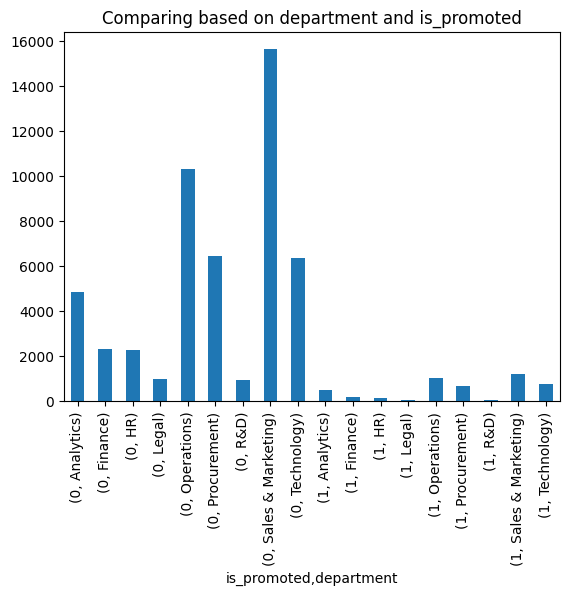

department
Analytics            10.968295
Finance               4.413025
HR                    2.913453
Legal                 1.135390
Operations           21.915167
Procurement          14.738646
R&D                   1.478149
Sales & Marketing    25.985433
Technology           16.452442
Name: employee_id, dtype: float64


In [376]:
#A bar plot of is_promoted by Department

dtrain.groupby(['is_promoted','department'])['employee_id'].count().plot(kind = 'bar')
plt.title('Comparing based on department and is_promoted')
plt.show()

#percentages of employess from each department who are promoted
d = dtrain[dtrain['is_promoted'] == 1].groupby('department').count()['employee_id']
print((d / d.sum()) * 100)

The highest number of employees in the company were from Sales and Marketing and the highest %age of promoted employees are also from the same department.

After sales we can see that a significant number of employees have been promoted from Operations.

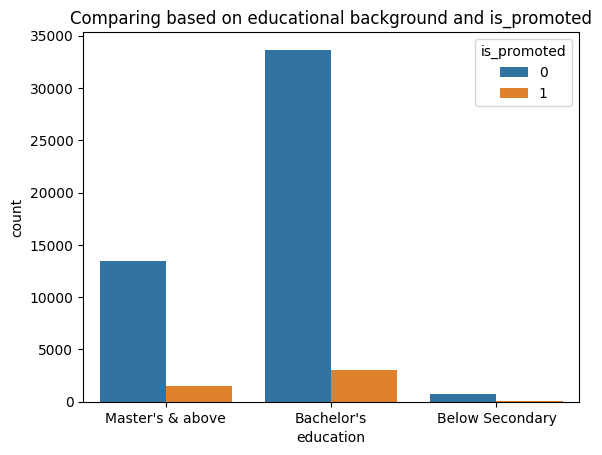

education
Bachelor's          66.168060
Master's & above    32.358117
Below Secondary      1.473823
Name: proportion, dtype: float64

In [377]:
# Employees with which educational background have been promoted the most?

sns.countplot(x = 'education', hue = 'is_promoted', data = dtrain)
plt.title('Comparing based on educational background and is_promoted')
plt.show()

#print percentages of  Below Secondary,Bachelor's & Master's & above who are promoted
dtrain[dtrain['is_promoted'] == 1]['education'].value_counts(normalize = True) * 100

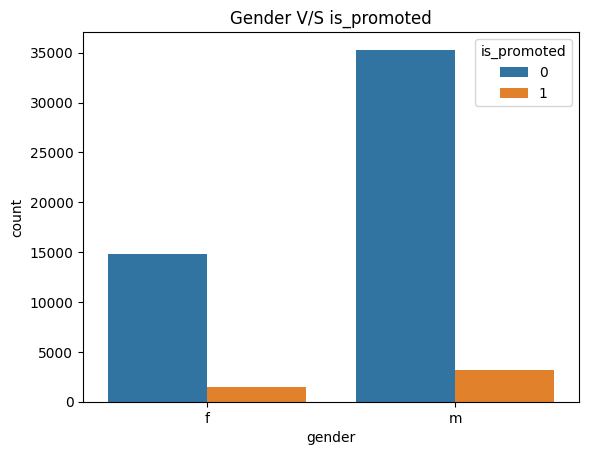

gender
m    68.573265
f    31.426735
Name: proportion, dtype: float64

In [378]:
# Gender V/S is_promoted

sns.countplot(x = 'gender', hue = 'is_promoted', data = dtrain)
plt.title('Gender V/S is_promoted')
plt.show()

#percentages of females vs. males who are promoted
dtrain[dtrain['is_promoted'] == 1]['gender'].value_counts(normalize = True) * 100

68.5% of the males are promoted.

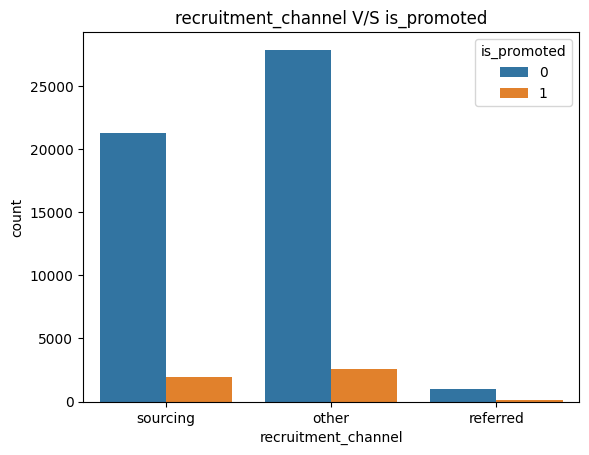

recruitment_channel
other       54.755784
sourcing    42.287918
referred     2.956298
Name: proportion, dtype: float64

In [379]:
# recruitment_channel V/S is_promoted

sns.countplot(x = 'recruitment_channel', hue = 'is_promoted', data = dtrain)
plt.title('recruitment_channel V/S is_promoted')
plt.show()

dtrain[dtrain['is_promoted'] == 1]['recruitment_channel'].value_counts(normalize = True) * 100

The employees who have been recruited from other channels are the one who have been promoted the most.

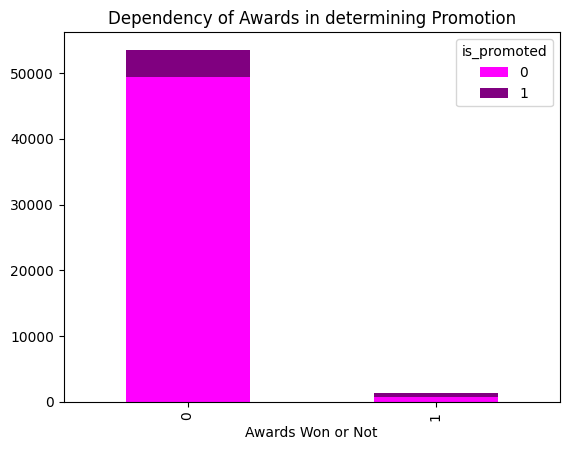

awards_won?
0    88.02485
1    11.97515
Name: proportion, dtype: float64

In [380]:
# dependency of awards won on promotion

data = pd.crosstab(dtrain['awards_won?'], dtrain['is_promoted'])
data.plot(kind = 'bar', stacked = True, color = ['magenta', 'purple'])

plt.title('Dependency of Awards in determining Promotion')
plt.xlabel('Awards Won or Not')
plt.show()

dtrain[dtrain['is_promoted'] == 1]['awards_won?'].value_counts(normalize = True) * 100

The people who have not won awards in the previous year are more in number and strangely 88% of these people have been promoted.

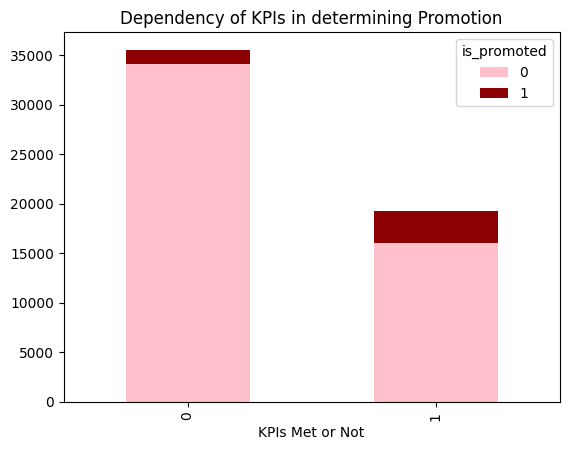

KPIs_met >80%
1    69.880034
0    30.119966
Name: proportion, dtype: float64


In [381]:
#dependency of KPIs with Promotion

data = pd.crosstab(dtrain['KPIs_met >80%'], dtrain['is_promoted'])
data.plot(kind = 'bar', stacked = True, color = ['pink', 'darkred'])

plt.title('Dependency of KPIs in determining Promotion')
plt.xlabel('KPIs Met or Not')
plt.show()

print(dtrain[dtrain['is_promoted'] == 1]['KPIs_met >80%'].value_counts(normalize = True) * 100)

Having a good KPI score increases the chances of getting promoted in the company.

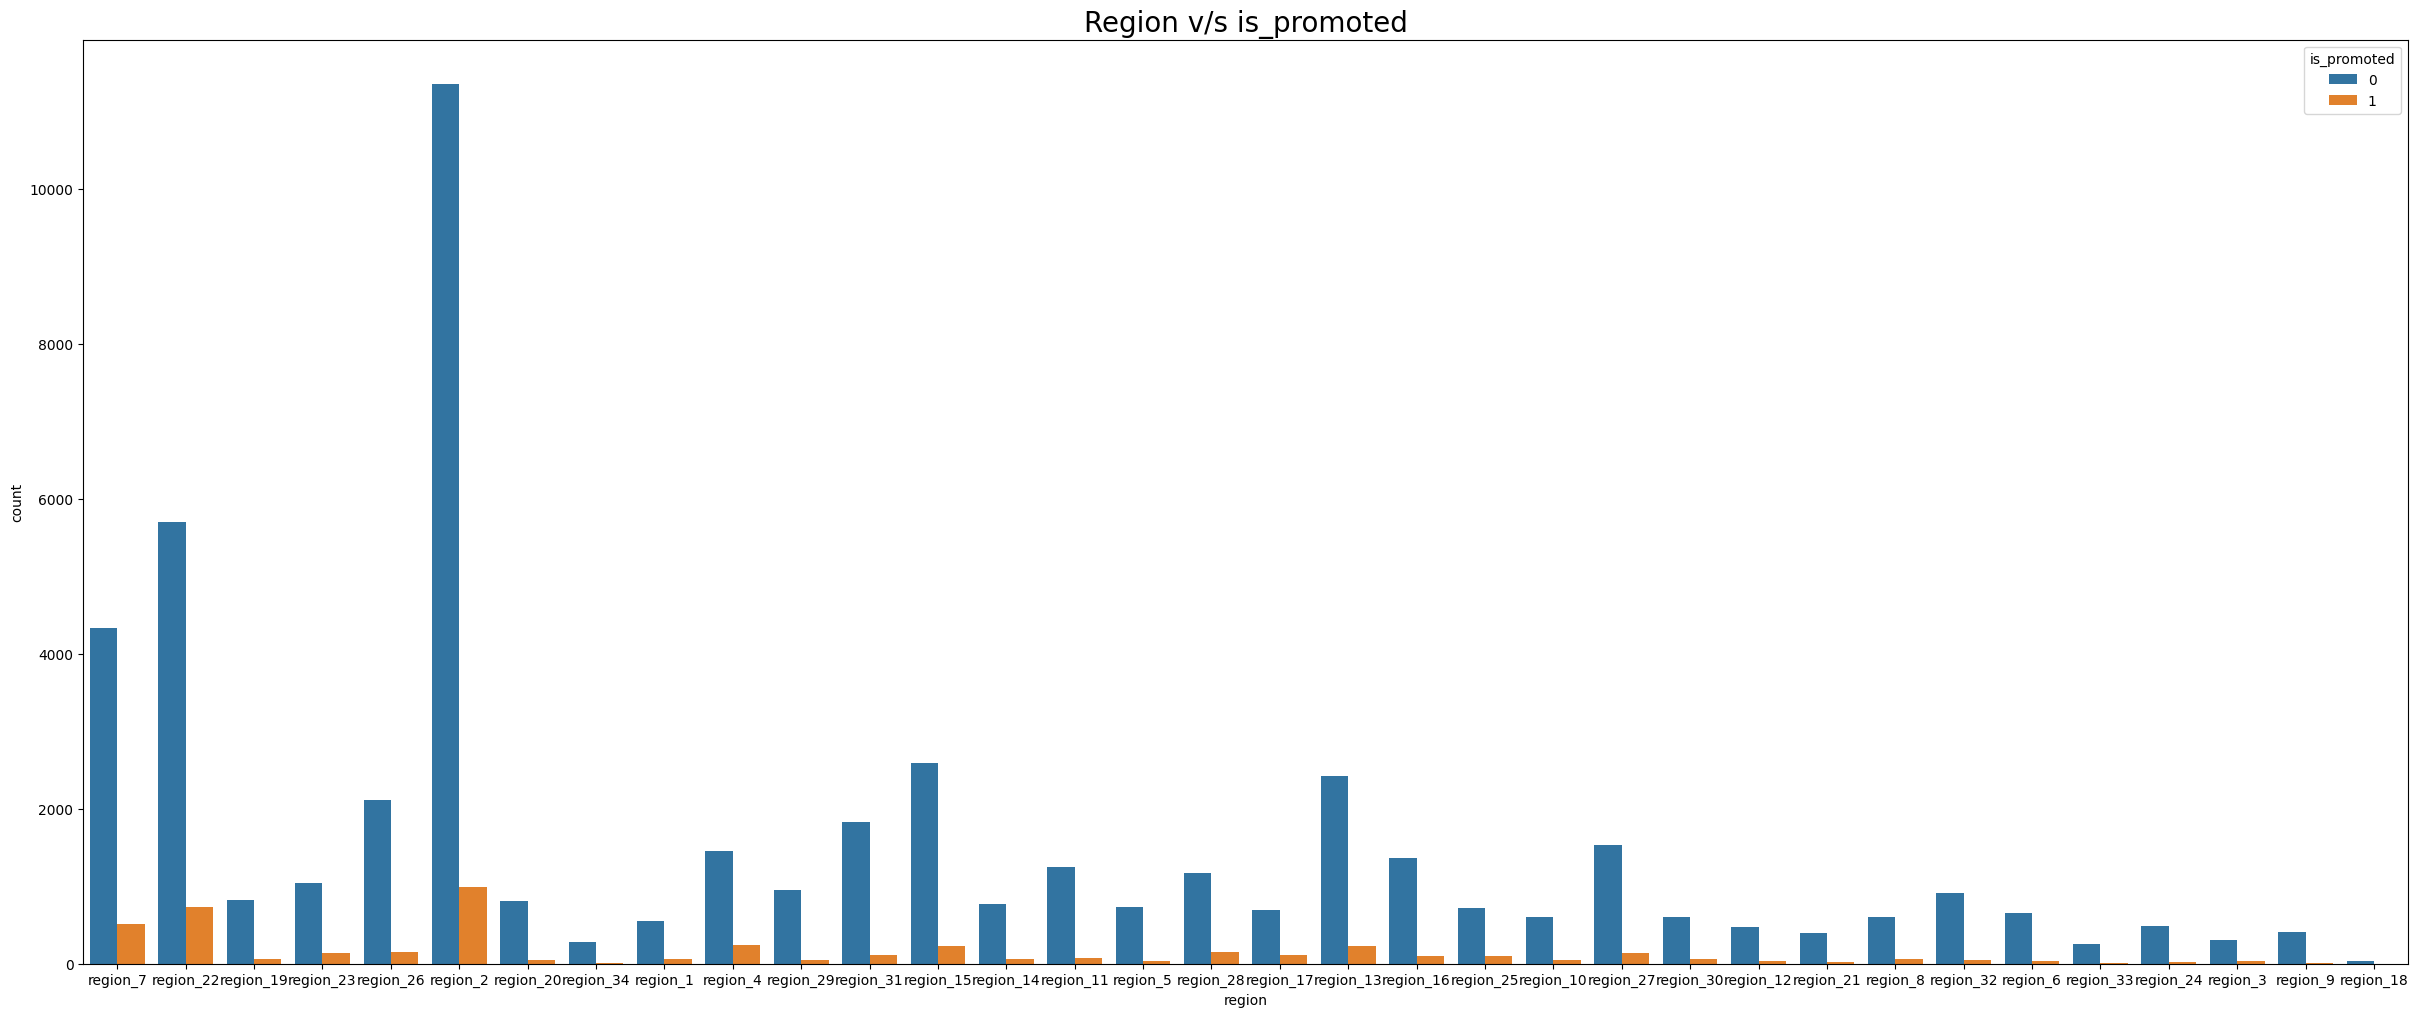

In [382]:
#Region and is_promoted

plt.figure(figsize=(30,12))
sns.countplot(x='region',data=dtrain,hue='is_promoted')
plt.title('Region v/s is_promoted',fontsize = 20)
plt.show()

Employees from region 2 and 22 have been promoted the most.

In [383]:
# combining the data for data prep

dtest['is_promoted']=np.nan
dtrain['data']='train'
dtest['data']='test'
test=dtest[dtrain.columns]

combined = pd.concat([dtrain,test], sort = False , ignore_index= True)

In [384]:
combined.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted,data
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,1,0,49,0.0,train
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,0,60,0.0,train
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,0,50,0.0,train
3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,0,50,0.0,train
4,48945,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,0,73,0.0,train


In [385]:
#Missing values

combined.isna().sum()

employee_id                 0
department                  0
region                      0
education                3443
gender                      0
recruitment_channel         0
no_of_trainings             0
age                         0
previous_year_rating     5936
length_of_service           0
KPIs_met >80%               0
awards_won?                 0
avg_training_score          0
is_promoted             23490
data                        0
dtype: int64

In [386]:
combined.education.value_counts()

education
Bachelor's          52247
Master's & above    21429
Below Secondary      1179
Name: count, dtype: int64

In [387]:
#filling in education with the maximum value(mode)

combined.education.fillna("Bachelor's",inplace=True)

In [388]:
combined.education.value_counts()

education
Bachelor's          55690
Master's & above    21429
Below Secondary      1179
Name: count, dtype: int64

In [389]:
combined.education.isna().sum()

0

In [390]:
combined.previous_year_rating.value_counts()

previous_year_rating
3.0    26539
5.0    16838
4.0    14126
1.0     8903
2.0     5956
Name: count, dtype: int64

In [391]:
#filling in previous_year_rating with the median

combined.previous_year_rating.fillna(combined.previous_year_rating.median(),inplace=True)

In [392]:
combined.previous_year_rating.value_counts()

previous_year_rating
3.0    32475
5.0    16838
4.0    14126
1.0     8903
2.0     5956
Name: count, dtype: int64

In [393]:
combined.isna().sum()

employee_id                 0
department                  0
region                      0
education                   0
gender                      0
recruitment_channel         0
no_of_trainings             0
age                         0
previous_year_rating        0
length_of_service           0
KPIs_met >80%               0
awards_won?                 0
avg_training_score          0
is_promoted             23490
data                        0
dtype: int64

In [394]:
combined.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 78298 entries, 0 to 78297
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   employee_id           78298 non-null  int64  
 1   department            78298 non-null  object 
 2   region                78298 non-null  object 
 3   education             78298 non-null  object 
 4   gender                78298 non-null  object 
 5   recruitment_channel   78298 non-null  object 
 6   no_of_trainings       78298 non-null  int64  
 7   age                   78298 non-null  int64  
 8   previous_year_rating  78298 non-null  float64
 9   length_of_service     78298 non-null  int64  
 10  KPIs_met >80%         78298 non-null  int64  
 11  awards_won?           78298 non-null  int64  
 12  avg_training_score    78298 non-null  int64  
 13  is_promoted           54808 non-null  float64
 14  data                  78298 non-null  object 
dtypes: float64(2), int6

In [395]:
combined.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted,data
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,1,0,49,0.0,train
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,0,60,0.0,train
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,0,50,0.0,train
3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,0,50,0.0,train
4,48945,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,0,73,0.0,train


In [396]:
x=combined.drop('is_promoted',axis=1)

In [397]:
combined['is_promoted'].fillna(combined['is_promoted'].median(), inplace=True)


In [398]:
y=combined['is_promoted']

In [399]:
x=pd.get_dummies(x,dtype=int)

In [400]:
x.head()

,employee_id,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,department_Analytics,department_Finance,...,education_Bachelor's,education_Below Secondary,education_Master's & above,gender_f,gender_m,recruitment_channel_other,recruitment_channel_referred,recruitment_channel_sourcing,data_test,data_train
0,65438,1,35,5.0,8,1,0,49,0,0,...,0,0,1,1,0,0,0,1,0,1
1,65141,1,30,5.0,4,0,0,60,0,0,...,1,0,0,0,1,1,0,0,0,1
2,7513,1,34,3.0,7,0,0,50,0,0,...,1,0,0,0,1,0,0,1,0,1
3,2542,2,39,1.0,10,0,0,50,0,0,...,1,0,0,0,1,1,0,0,0,1
4,48945,1,45,3.0,2,0,0,73,0,0,...,1,0,0,0,1,1,0,0,0,1


In [401]:
# splitting x and y into train and validation sets
#train test split for model building
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25,random_state=42)

In [402]:
# standard scaling

from sklearn.preprocessing import MinMaxScaler

sc = MinMaxScaler()
x_test=sc.fit_transform(x_test)
x_train=sc.fit_transform(x_train)

Model building


Linear Regression

In [403]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix , accuracy_score,f1_score,recall_score,precision_score

In [404]:
log_reg=LogisticRegression()

In [405]:
log_reg.fit(x_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [406]:
y_pred=log_reg.predict(x_test)

In [407]:
y_pred

array([0., 0., 0., ..., 0., 0., 0.])

In [408]:
print('Accuracy_score:',accuracy_score(y_test,y_pred))

Accuracy_score: 0.9527458492975734


In [409]:
print('f1_score:',f1_score(y_test,y_pred))

f1_score: 0.36687200547570165


Decision Tree
Hyperparameter Tuning

In [410]:
#importing libraries kNN,SVC,GradientBoosting,AdaBoost,xgb
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier, AdaBoostClassifier
import xgboost as xgb

In [411]:
knn_classifier = KNeighborsClassifier()
svm_classifier = SVC()
gb_classifier = GradientBoostingClassifier()
ada_classifier = AdaBoostClassifier()
xgb_classifier = xgb.XGBClassifier()

In [412]:
#Training
knn_classifier.fit(x_train, y_train)
svm_classifier.fit(x_train, y_train)
gb_classifier.fit(x_train, y_train)
ada_classifier.fit(x_train, y_train)
xgb_classifier.fit(x_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [413]:
#Predicting
knn_preds = knn_classifier.predict(x_test)
svm_preds = svm_classifier.predict(x_test)
gb_preds = gb_classifier.predict(x_test)
ada_preds = ada_classifier.predict(x_test)
xgb_preds = xgb_classifier.predict(x_test)

In [414]:
#Checking for Accuracy
from sklearn.metrics import accuracy_score

In [415]:
knn_accuracy = accuracy_score(y_test, knn_preds)
svm_accuracy = accuracy_score(y_test, svm_preds)
gb_accuracy = accuracy_score(y_test, gb_preds)
ada_accuracy = accuracy_score(y_test, ada_preds)
xgb_accuracy = accuracy_score(y_test, xgb_preds)

In [416]:
print("k-NN Accuracy:", knn_accuracy,
      ("SVM Accuracy:", svm_accuracy),
      ("GBA:", gb_accuracy),
      ("AdaBoost Accuracy:", ada_accuracy),
      ("XGB Accuracy:", xgb_accuracy))

k-NN Accuracy: 0.9378799489144317 ('SVM Accuracy:', 0.9503959131545339) ('GBA:', 0.9567816091954023) ('AdaBoost Accuracy:', 0.9477394636015326) ('XGB Accuracy:', 0.9590804597701149)


In [417]:
#Tuning
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score, KFold

In [418]:
kf = KFold(n_splits = 10)

In [419]:
for train_index, test_index in kf.split(x,y):
  print('Training Index',train_index)
  print('Test Index',test_index)

Training Index [ 7830  7831  7832 ... 78295 78296 78297]
Test Index [   0    1    2 ... 7827 7828 7829]
Training Index [    0     1     2 ... 78295 78296 78297]
Test Index [ 7830  7831  7832 ... 15657 15658 15659]
Training Index [    0     1     2 ... 78295 78296 78297]
Test Index [15660 15661 15662 ... 23487 23488 23489]
Training Index [    0     1     2 ... 78295 78296 78297]
Test Index [23490 23491 23492 ... 31317 31318 31319]
Training Index [    0     1     2 ... 78295 78296 78297]
Test Index [31320 31321 31322 ... 39147 39148 39149]
Training Index [    0     1     2 ... 78295 78296 78297]
Test Index [39150 39151 39152 ... 46977 46978 46979]
Training Index [    0     1     2 ... 78295 78296 78297]
Test Index [46980 46981 46982 ... 54807 54808 54809]
Training Index [    0     1     2 ... 78295 78296 78297]
Test Index [54810 54811 54812 ... 62637 62638 62639]
Training Index [    0     1     2 ... 78295 78296 78297]
Test Index [62640 62641 62642 ... 70466 70467 70468]
Training Index [

In [420]:
model = LogisticRegression(max_iter=100)

In [421]:
score = cross_val_score(model,x,y,cv = kf)
print("Cross Validation Scores are{}".format(score))


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

Cross Validation Scores are[0.9109834  0.91736909 0.91775223 0.91749681 0.91404853 0.91149425
 0.9146871  1.         1.         1.        ]


In [422]:
print('Averge Cross Validaton Score is {}'.format(score.mean()))

Averge Cross Validaton Score is 0.940383141762452


In [423]:
#Stratified K Fold
from sklearn.model_selection import StratifiedKFold

In [424]:
skfold_validator = StratifiedKFold (n_splits = 10)

In [425]:
for train_index, test_index in skfold_validator.split(x,y):
  print('Training Index', train_index)
  print('Test Index', test_index)

Training Index [ 5111  5139  5150 ... 78295 78296 78297]
Test Index [   0    1    2 ... 8082 8084 8085]
Training Index [    0     1     2 ... 78295 78296 78297]
Test Index [ 5111  5139  5150 ... 16103 16104 16106]
Training Index [    0     1     2 ... 78295 78296 78297]
Test Index [10461 10474 10478 ... 24136 24137 24138]
Training Index [    0     1     2 ... 78295 78296 78297]
Test Index [16432 16473 16491 ... 32154 32155 32156]
Training Index [    0     1     2 ... 78295 78296 78297]
Test Index [22191 22193 22198 ... 40219 40220 40221]
Training Index [    0     1     2 ... 78295 78296 78297]
Test Index [27973 27999 28001 ... 48266 48267 48268]
Training Index [    0     1     2 ... 78295 78296 78297]
Test Index [33430 33464 33466 ... 56206 56207 56208]
Training Index [    0     1     2 ... 78295 78296 78297]
Test Index [38742 38748 38758 ... 63569 63570 63571]
Training Index [    0     1     2 ... 78295 78296 78297]
Test Index [44016 44022 44043 ... 70932 70933 70934]
Training Index [

In [426]:
skcv_results = cross_val_score(model,x, y, cv = skfold_validator)
skcv_results

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

array([0.93984674, 0.9403576 , 0.93997446, 0.93959132, 0.9403576 ,
       0.93971903, 0.9403576 , 0.9403576 , 0.94047771, 0.94047771])

In [427]:
print('Averge Stratified Cross Validaton Score is {}'.format(skcv_results.mean()))

Averge Stratified Cross Validaton Score is 0.9401517363400018


In [428]:
#Tuning with decision tree
from sklearn import tree

In [429]:
#cross-validation with different values
max_depth = [1,2,3,4,5,6,7,8,9,10]

In [430]:
for val in max_depth:
  score = cross_val_score(tree.DecisionTreeClassifier(max_depth = val), x, y, cv = kf, scoring = 'accuracy')
  print(f'Average score{val}): {"{:.3f}".format(score.mean())}')

Average score1): 0.943
Average score2): 0.946
Average score3): 0.946
Average score4): 0.945
Average score5): 0.948
Average score6): 0.949
Average score7): 0.951
Average score8): 0.954
Average score9): 0.953
Average score10): 0.955


In [431]:
# Define a hyperparameter grid
parameters ={'n_estimators': [100, 200],
    'max_depth': [10, 2],
    'criterion': ['gini','entropy']
}

In [432]:
from sklearn.model_selection import GridSearchCV

In [433]:
# Create the grid search object
from sklearn.ensemble import RandomForestClassifier
grid_search = GridSearchCV(
    RandomForestClassifier(),
    parameters,
    cv = 5,# 5-fold cross-validation
    scoring = 'accuracy',# Evaluation metric
    n_jobs = -1
)

In [434]:
#fit the grid search
grid_result = grid_search.fit(x_train,y_train)

In [435]:
#  the best parameters and best score
print('Best Params: ', grid_result.best_params_)
print('Best Score: ', grid_result.best_score_*100)

Best Params:  {'criterion': 'gini', 'max_depth': 10, 'n_estimators': 200}
Best Score:  94.69032767146551


In [437]:
y_pred

314.0

In [439]:
df = pd.DataFrame({'employee_id': range(len(y_pred)), 'y_pred': y_pred})

In [440]:
df

,employee_id,y_pred
0,0,0.0
1,1,0.0
2,2,0.0
3,3,0.0
4,4,0.0
...,...,...
19570,19570,0.0
19571,19571,0.0
19572,19572,0.0
19573,19573,0.0


In [444]:
from google.colab import  drive

In [445]:
drive.mount('/drive')

Mounted at /drive


In [446]:
df.to_csv('/drive/My Drive/dataset/submission.csv')